# Idea behind the project

Create a computer vision program that finds a sticky-note in a webcam feed, draws a rectangle around the object of interest, and finds the distance from the center of the sticky-note to the camera and shows it in the feed. The following shows an example output: 

1. **Import Libraries**

In [ ]:
import cv2 as cv
import numpy as np
# this package is bcuz google colab disables popups
from google.colab.patches import cv2_imshow

2. **Read the image & filter all colors but the color of the sticky note**
Note: to get the range of HSV used in filtering the image run the last cell <br>
- Make use from the flashy color of sticky notes use HSV as threshold to filter out all other colors in the pitcure 
[[1]](https://docs.opencv.org/4.5.2/da/d97/tutorial_threshold_inRange.html)

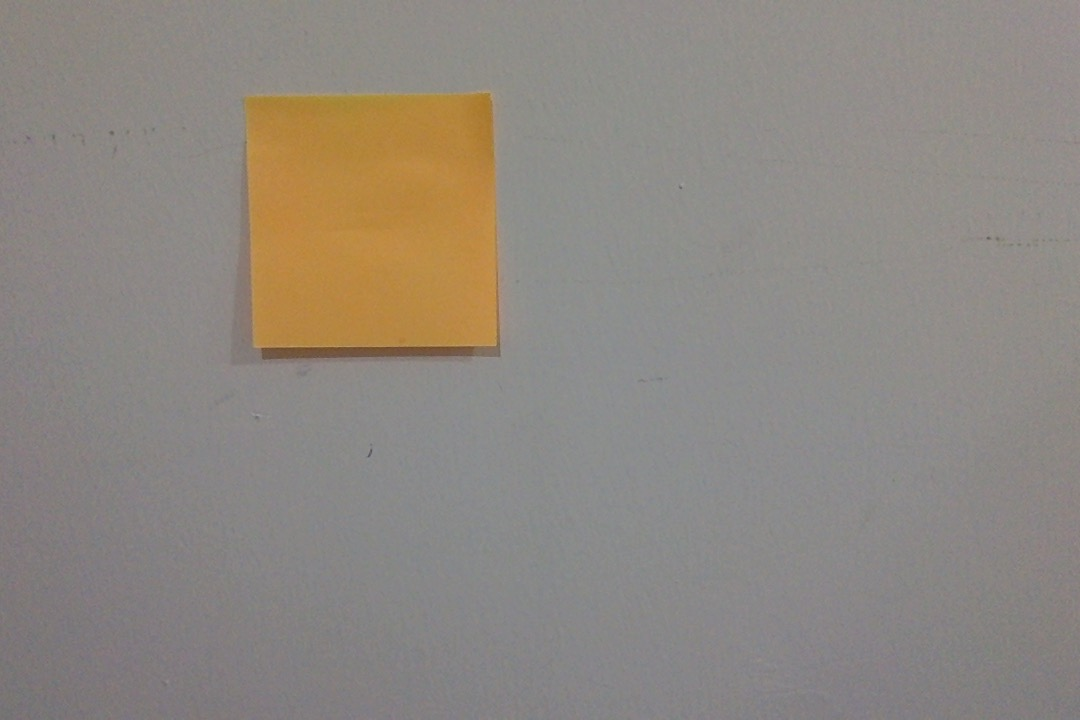the image used is the following


In [ ]:
# read the image in BGR
original_image=cv.imread('/content/image1.jpg')
# convert to HSV spectrum 
HSV_image= cv.cvtColor(original_image, cv.COLOR_BGR2HSV)
# define the range of HSV filter

HSV_min=np.array([7, 48, 0])
HSV_max=np.array([179, 225, 255])
# Thresholding operation in HSV color space using inRange function(if within the hsv range pixel_color=255, else pixel_color=0)
mask= cv.inRange(HSV_image, HSV_min,HSV_max)
#find all contours in the image and draw them on the original image
contours, hierarchy = cv.findContours(mask,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
#image_final=cv.drawContours(original_image, contours, -1, (255,255,255), 1)
#cv2_imshow(mask)
#cv2_imshow(image_final)

3. **Find center point in the detected object (sticky note)** <br>
  3.1 find the contour with the largest area <br>
  3.2 using moment find the center of the sticky-note contour<br>


---

**Moment** : is how the physical quantity is distributed or located.<br>
So,Image moment is how image pixel intensities are distributed according to their location [[2]](https://towardsdatascience.com/computer-vision-for-beginners-part-4-64a8d9856208)
<br>

In [ ]:
center = [0, 0]
if len(contours) > 0:
    contour = contours[0]
    area = cv.contourArea(contour)

    for c in contours:
      if cv.contourArea(c) > area:
          area = cv.contourArea(c)
          contour = c
    m = cv.moments(contour)
    center = [0, 0]
    if m['m00'] != 0:
      x,y= int(m['m10'] / m['m00']), int(m['m01'] / m['m00'])
      center = [x,y]

4. **Find the distance btw the camera and the object (sticky-note)**

In [ ]:
dimensions=cv.minAreaRect(contour)
pixel_width=dimensions[1][0]
measured_width=7.3
focal_length=1077.89
measured_distance=(measured_width*focal_length)/pixel_width

5. **Print all outputs on the original image**
- The measured distance by the program is 37.01 cm
- the actual distance btw the camera and sticky-note is 37.0 cm
- Error = 0.01 

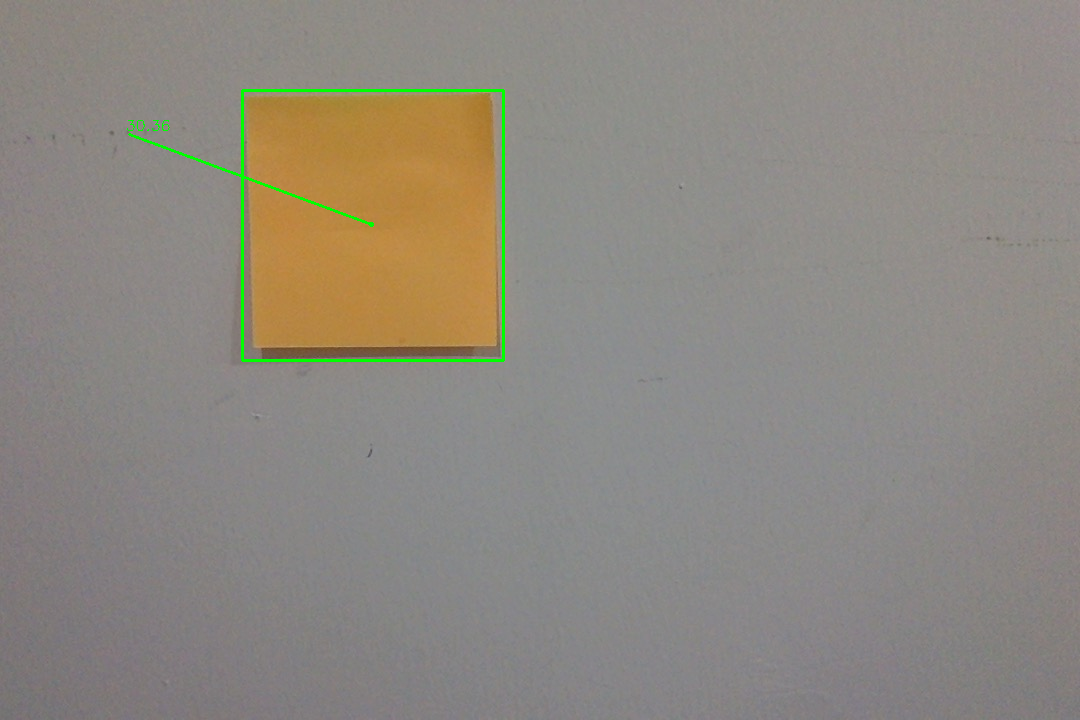

In [ ]:
x,y=int(area/center[1]),int(area/center[0])
x, y, w, h = cv.boundingRect(contour)
img_final = original_image.copy()
cv.rectangle(img_final, (x, y), (x+w, y+h), color = (0, 255, 0), thickness = 2)
cv.circle(img_final, (center[0],center[1]),1,(0,255,),2)
cv.line(img_final, (center[0],center[1]) ,(center[0]-x,center[1]-y),(0,255,0),thickness=2)
cv.putText(img_final,str(round(measured_distance,2)) ,(center[0]-x-4,center[1]-y-4),cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), thickness=1)
cv2_imshow(img_final)


# (Q2: optional) find the HSV minimum and maximum range
run the code on your local machine


In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load in image
image = cv2.imread('test33.jpg')

# Create a window
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('HMin','image',0,179,nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin','image',0,255,nothing)
cv2.createTrackbar('VMin','image',0,255,nothing)
cv2.createTrackbar('HMax','image',0,179,nothing)
cv2.createTrackbar('SMax','image',0,255,nothing)
cv2.createTrackbar('VMax','image',0,255,nothing)

# Set default value for MAX HSV trackbars.
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize to check if HSV min/max value changes
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

output = image
wait_time = 33

while(1):

    # get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin','image')
    sMin = cv2.getTrackbarPos('SMin','image')
    vMin = cv2.getTrackbarPos('VMin','image')

    hMax = cv2.getTrackbarPos('HMax','image')
    sMax = cv2.getTrackbarPos('SMax','image')
    vMax = cv2.getTrackbarPos('VMax','image')

    # Set minimum and max HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Create HSV Image and threshold into a range.
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(image,image, mask= mask)

    # Print if there is a change in HSV value
    if( (phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display output image
    cv2.imshow('image',output)

    # Wait longer to prevent freeze for videos.
    if cv2.waitKey(wait_time) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

# (Q2: optional) find the Focal Length of my Camera

- Focal length can be found in camera specs sheet , however apple does not publish each macbook camera specs. Thus i had to calculate it manually using the equation: 


In [ ]:
# All measurements are in centimeter unit
dimensions=cv.minAreaRect(contour)
pixel_width,measured_width,measured_distance=dimensions[1][0],7.45,32.5
focal_length=(pixel_width*measured_distance)/measured_width